In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
import scipy.stats as st
# from PIL import Image, ImageDraw

# Set to true if you want to get figures
# Set to false if you don't want the code to run for long
get_figs = False

# Exercise 1: Get the mandelbrot set and make some nice figures of it


In [2]:
# Returns the amount of interations needed to reach a modulus > 2 
def mandelbrot(c, z, iteration, MaxIter):
    # Define the basecase
    if ((iteration < MaxIter) and (abs(z) <= 2)):
        z = z*z + c
        iteration += 1
        return mandelbrot(c, z, iteration, MaxIter)
    else:
        return iteration

# DO NOT run the cell below, otherwise the figures will disappear. 

## The figures can be found in the folder "figs1"

In [3]:
# DO NOT RUN THIS CELL OTHERWISE THE FIGURES DISAPPEAR

grids = [100, 200, 500, 1000]
iterations = [20, 50, 100, 250]


if get_figs:
    for grid_size in grids:
        for iters in iterations:
            
            '''
            Full set
            '''
            re_min = -2
            re_max = 2
            im_min = -1.5
            im_max = 1.5
            
            # set params
            x_dist = re_max - re_min
            y_dist = im_max - im_min
            mandelbrotset = np.empty((grid_size, grid_size))
            real = np.arange(re_min, re_max, x_dist/grid_size)
            imag = np.arange(im_max, im_min, -y_dist/grid_size)
            
            # get the mandelbrot set for the grain size, iterations, and extent
            for j in range(grid_size):
                for i in range(grid_size):
                    mandelbrotset[j,i] = mandelbrot(complex(real[i], imag[j]), 0, 0, iters)
            
            # make the figures
            plt.figure(figsize=(5, 4), dpi=500)
            plt.imshow(mandelbrotset, cmap="plasma", extent=[re_min, re_max, im_min, im_max])
            plt.xlabel("Real part of the complex number")
            plt.ylabel("Imaginary part of the complex number")
            plt.colorbar()
            plt.savefig("figs1/mandelbrotfullset_gridsize{0}_{1}iterations".format(grid_size, iters))
            plt.show()
            
            '''
            Boundary detail
            '''
            re_min = -0.2
            re_max = 0
            im_min = 0.8
            im_max = 1
            
            # set params
            x_dist = re_max - re_min
            y_dist = im_max - im_min
            mandelbrotset = np.empty((grid_size, grid_size))
            real = np.arange(re_min, re_max, x_dist/grid_size)
            imag = np.arange(im_max, im_min, -y_dist/grid_size)            
            # get the mandelbrot set for the grain size, iterations, and extent
            for j in range(grid_size):
                for i in range(grid_size):
                    mandelbrotset[j,i] = mandelbrot(complex(real[i], imag[j]), 0, 0, iters)
            
            # make the figures
            plt.figure(figsize=(6, 5), dpi=500)
            plt.imshow(mandelbrotset, cmap="plasma", extent=[re_min, re_max, im_min, im_max])
            plt.xlabel("Real part of the complex number")
            plt.ylabel("Imaginary part of the complex number")
            plt.colorbar()
            plt.savefig("figs1/mandelbrotboundarydetail_gridsize{0}_{1}iterations".format(grid_size, iters))
            plt.show()
        

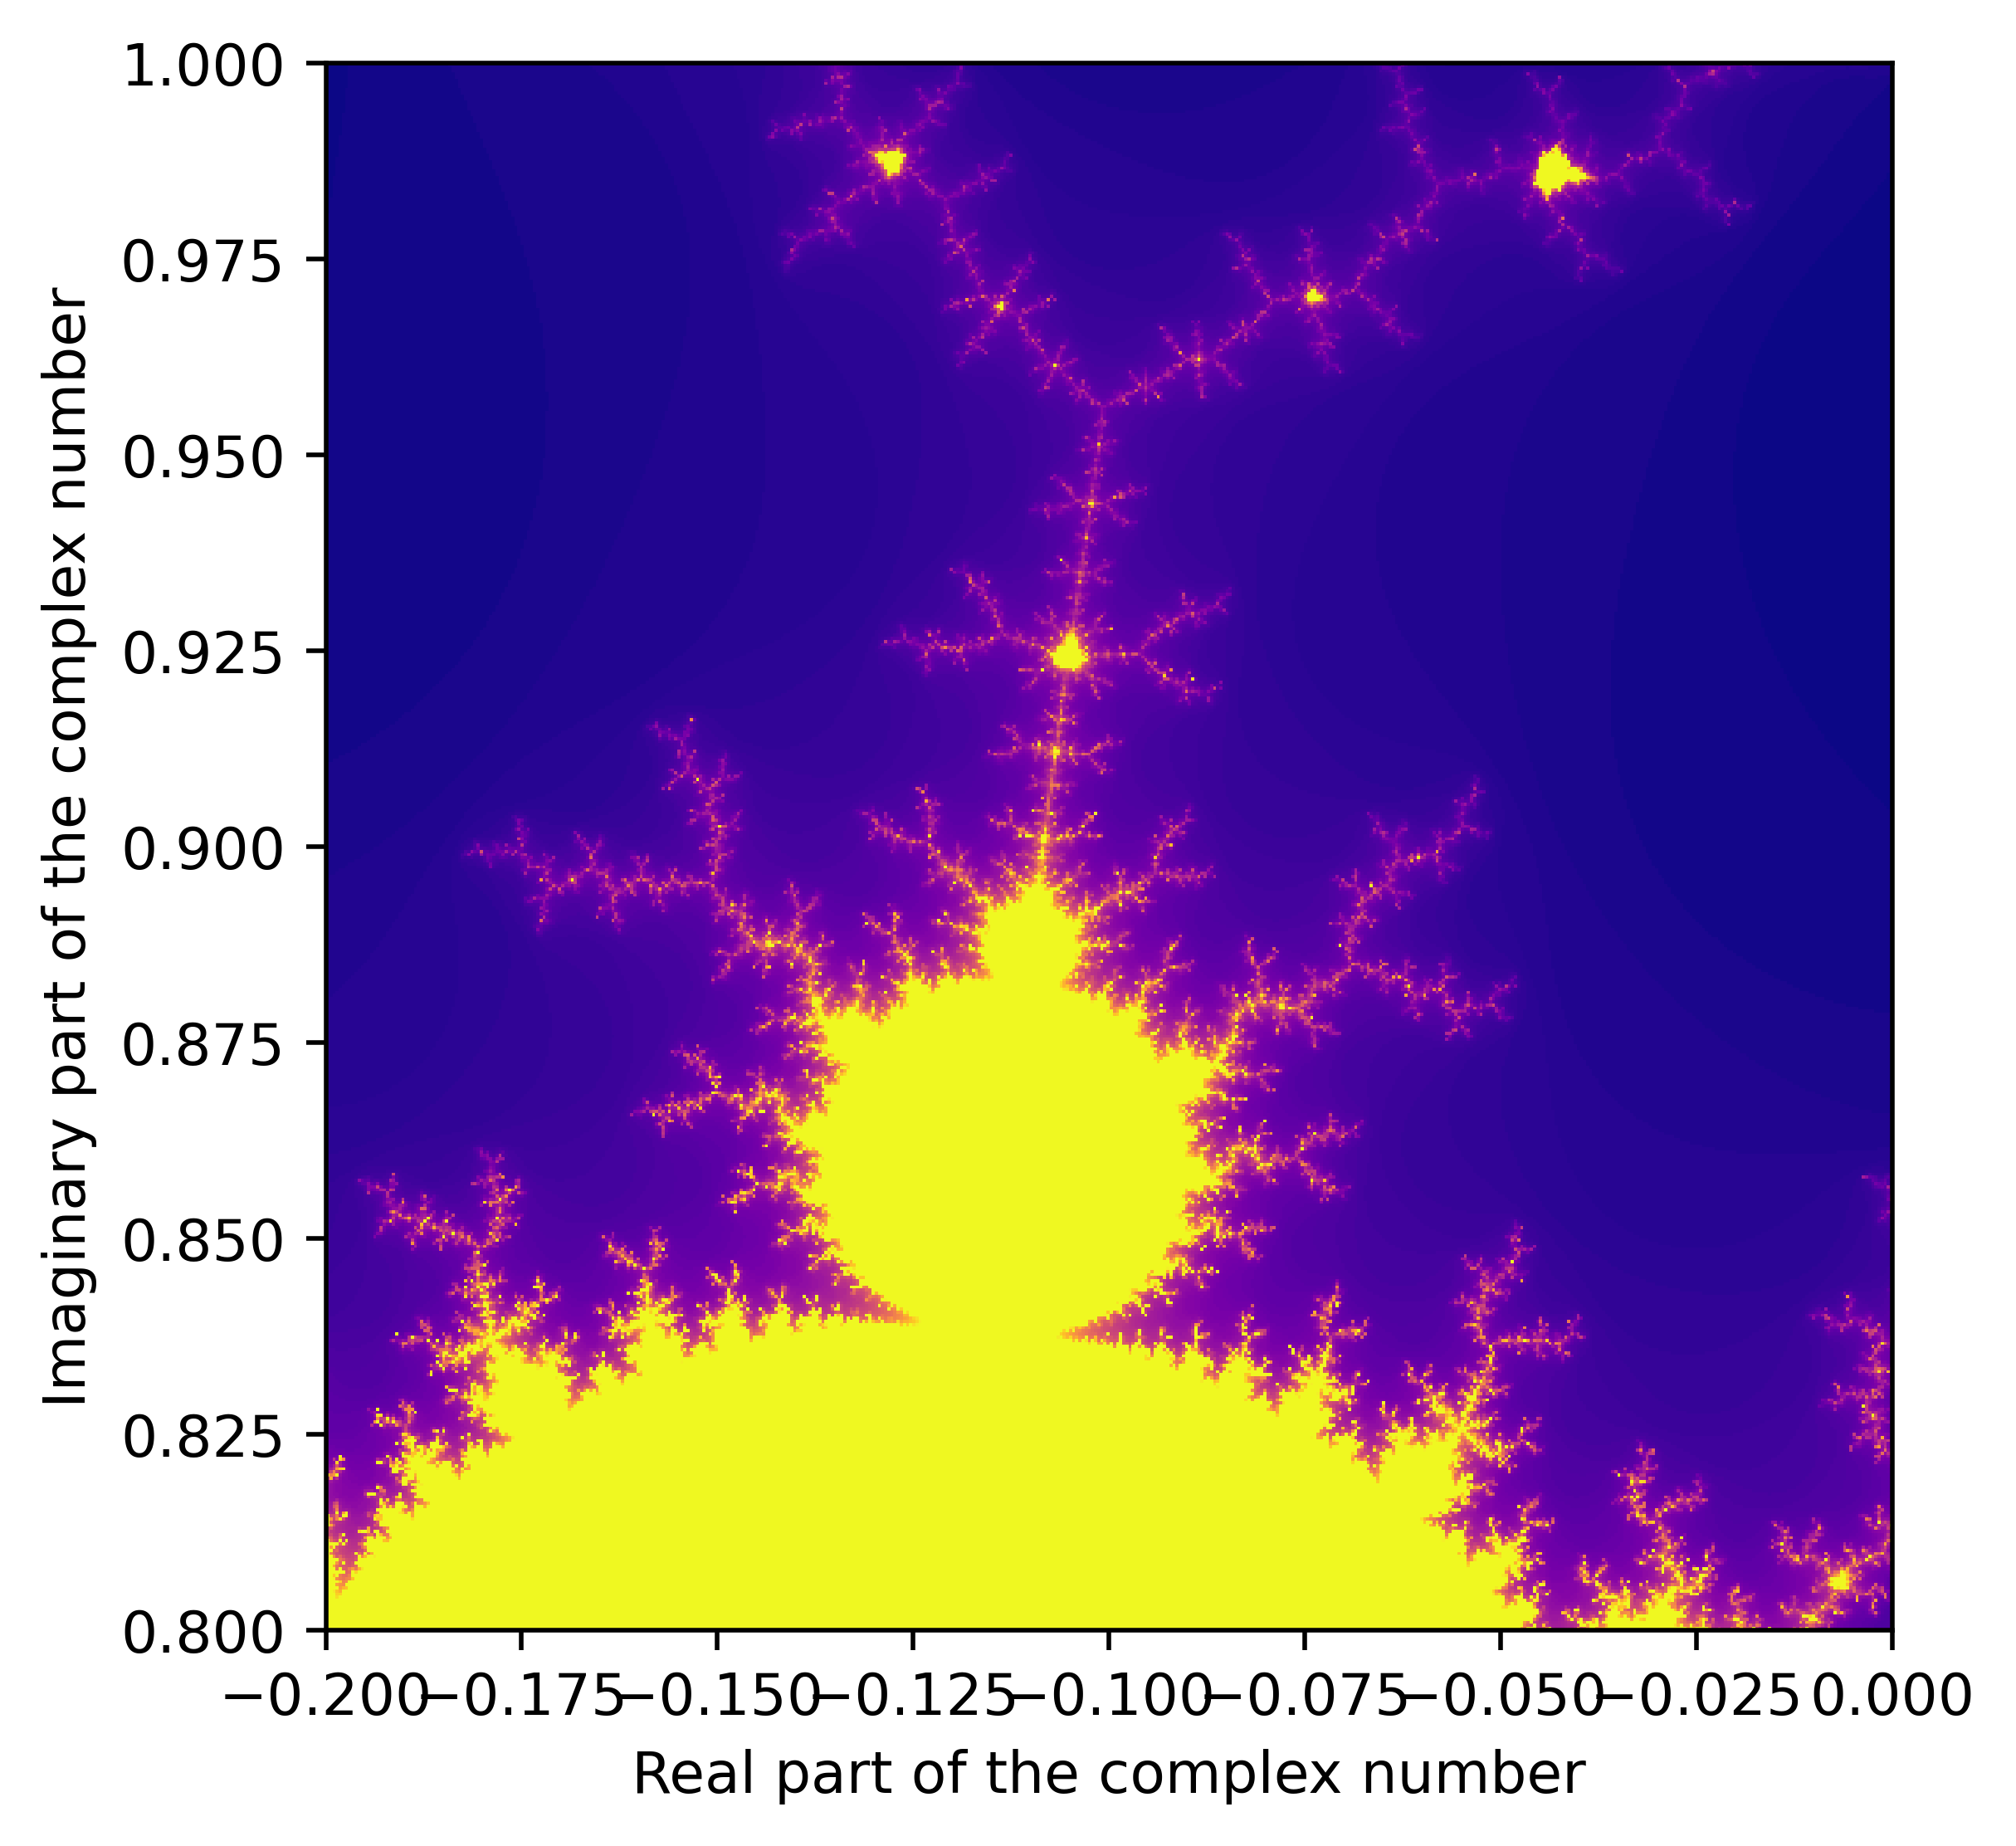

In [35]:
# make figures

grid_size = 500
iters = 100
re_min = -0.2
re_max = 0
im_min = 0.8
im_max = 1

x_dist = re_max - re_min
y_dist = im_max - im_min

unit = np.empty((grid_size, grid_size))
real = np.arange(re_min, re_max, x_dist/grid_size)
imag = np.arange(im_max, im_min, -y_dist/grid_size)

for j in range(grid_size):
    for i in range(grid_size):
        unit[j,i] = mandelbrot(complex(real[i], imag[j]), 0, 0, iters)
        
plt.figure(figsize=(5, 5), dpi=500)
plt.imshow(unit, cmap="plasma", extent=[re_min, re_max, im_min, im_max])
x_ticks = np.arange(re_min, re_max, x_dist/4)
y_ticks = np.arange(re_max, re_min, y_dist/4)
plt.xlabel("Real part of the complex number")
plt.ylabel("Imaginary part of the complex number")
plt.show()


# Exercise 2: Get the surface area of the Mandelbrot set using Pure Random Sampling

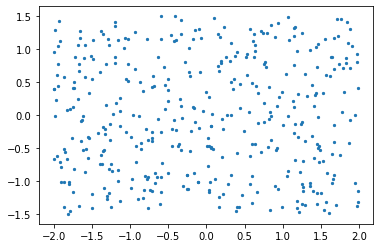

In [5]:
def monte_carlo_mandelbrot_set(MaxIter, no_samples, re_min = -2, re_max = 2, im_min = -1.5, im_max = 1.5):
    points_in_mdlbrt = 0
    
    for sample in range(no_samples):
        c = complex(random.uniform(re_min, re_max), random.uniform(im_min, im_max))
        
        if mandelbrot(c, 0, 0, MaxIter) == MaxIter:
            points_in_mdlbrt += 1
            
    area = (re_max-re_min) * (im_max-im_min) 
    return  area * points_in_mdlbrt / no_samples


def monte_carlo_mandelbrot_set_withsamples(MaxIter, no_samples, re_min = -2, re_max = 2, im_min = -1.5, im_max = 1.5):
    points_in_mdlbrt = 0
    actual_samples = []
    
    for sample in range(no_samples):
        real_sample = random.uniform(re_min, re_max)
        imag_sample = random.uniform(im_min, im_max)
        c = complex(real_sample, imag_sample)
        actual_samples.append([real_sample, imag_sample])
        
        if mandelbrot(c, 0, 0, MaxIter) == MaxIter:
            points_in_mdlbrt += 1
            
    area = (re_max-re_min) * (im_max-im_min) 
    return  (area * points_in_mdlbrt / no_samples), np.array(actual_samples)

_, samples = monte_carlo_mandelbrot_set_withsamples(200, 400)
plt.scatter(samples[:,0], samples[:,1], s=5)
plt.show()

In [6]:
i = 200
s = 5000
A_i_s = monte_carlo_mandelbrot_set(i, s)

Text(0, 0.5, '$A_{js} -  A_{is}$')

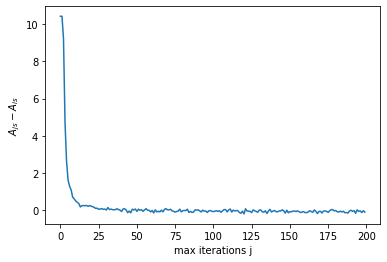

In [7]:
js = np.arange(0, i)
area_diffs = []
for j in js:
    A_j_s = monte_carlo_mandelbrot_set(j, s)
    area_diffs.append(A_j_s - A_i_s)
plt.plot(js, area_diffs)
plt.xlabel("max iterations j")
plt.ylabel("$A_{js} -  A_{is}$")

Text(0, 0.5, '$A_{js} -  A_{is}$')

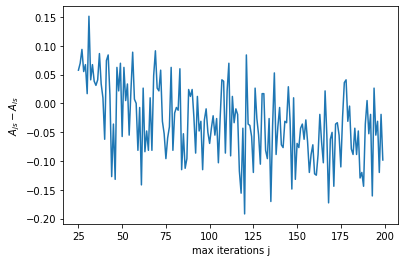

In [8]:
#Also plot from 50 to 200
plt.plot(js[25:], area_diffs[25:])
plt.xlabel("max iterations j")
plt.ylabel("$A_{js} -  A_{is}$")

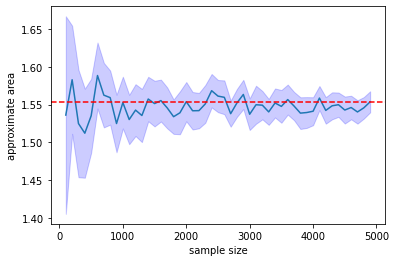

In [9]:
# Nina kijk hier
runs = 50
s = np.arange(100, 5000, 100)
i = 100
areas = np.empty((len(s), runs))

for idx in range(0, len(s)):
    for run in range(0, runs):
        areas[idx][run] = monte_carlo_mandelbrot_set(i, s[idx])
        
mean_areas = np.mean(areas, axis=1)
std = np.std(areas, axis=1)

#95% confidence interval
cis = [st.t.interval(alpha=0.95, df=len(run)-1, loc=np.mean(run), scale=st.sem(run)) for run in areas]
cis_lower = [i[0] for i in cis]
cis_higher = [i[1] for i in cis] 

plt.plot(s, mean_areas)
plt.fill_between(s, cis_lower, cis_higher, color='blue', alpha=0.2)
plt.xlabel("sample size")
plt.ylabel("approximate area")
plt.axhline(y = mean_areas[-1], color = 'r', linestyle = 'dashed')  

In [10]:
runs = 50
i = 100
s = 5000
A_i_s = np.empty(runs)
for run in range(0, runs):
    A_i_s[run] = monte_carlo_mandelbrot_set(i, s)
mean = np.mean(A_i_s)
ci = st.t.interval(alpha=0.95, df=len(A_i_s)-1, loc=mean, scale=st.sem(A_i_s)) 
std = np.std(A_i_s)


print("The mean is:", mean)
print("The 95% confidence interval is", ci)
print("The standard deviation is", std)

The mean is: 1.546944
The 95% confidence interval is (1.5294634682996897, 1.5644245317003105)
The standard deviation is 0.06089034130303425


# Exercise 3: Get the surface area of the Mandelbrot set using Latin Hypercube and Orthogonal Sampling

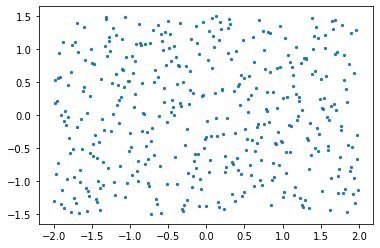

In [11]:
# https://thispointer.com/delete-elements-from-a-numpy-array-by-value-or-conditions-in-python/

def LatinHypercube(MaxIter, no_samples, re_min = -2, re_max = 2, im_min = -1.5, im_max = 1.5):
    actual_samples = []
    re_dist = re_max - re_min
    im_dist = im_max - im_min
    real = np.arange(re_min, re_max, re_dist/no_samples)
    imag = np.arange(im_max, im_min, -im_dist/no_samples)
    points_in_mdlbrt = 0
    
    for _ in range(no_samples):
        realsample = random.choice(real)
        imagsample = random.choice(imag)
        actual_samples.append([realsample, imagsample])
        
        # update arrays with reals and imags
        real = real[real != realsample]
        imag = imag[imag != imagsample]
    
        if mandelbrot(complex(realsample, imagsample), 0, 0, MaxIter) == MaxIter:
            points_in_mdlbrt += 1
    
    
    area = re_dist * im_dist
    return  (area * points_in_mdlbrt / no_samples) , np.array(actual_samples)
    
samples = LatinHypercube(200, 400)[1]
plt.scatter(samples[:,0], samples[:,1], s=5)
plt.show()

In [12]:
# Orthogonal unit, verdeel grote square over M^2 subsquares. 
# Verdeel N samples ook over de subs, dus N/M^2 samples per subsquare. 
# De samples over main square zijn LH, elke sub is ook LH

# DEZE KLOPT NOG NIET MAAR IK LOOP VAST EN WOU IIG IETS HEBBEN

def Ortho(MaxIter, no_samples, M, re_min = -2, re_max = 2, im_min = -1.5, im_max = 1.5):
    
    re_interval = (re_max - re_min)/M
    im_interval = (im_max - im_min)/M
    area = 0
    no_samples_sub = int(no_samples/M**2)
    
    # Dit kan slimmer door gwn de mins en maxs aan te passen ipv steeds de unit te splitten
    # dit is wat ik atm bij de boundary zoom (recursief) aan het proberen ben
    # Het kan ook zijn dat dit niet werkt hoor.

    
    for i in range(M):
        for j in range(M):
            temp = LatinHypercube(MaxIter, no_samples_sub, re_min=re_min+i*re_interval, re_max=re_min+(i+1)*re_interval, im_min=im_min+j*im_interval, im_max=im_min+(j+1)*im_interval)[0]
            area += temp
    
    return(area)

# for _ in range(10):
print(Ortho(100, 10000, 4))

1.506


# Plan

Okee ik heb een idee, we kunnen voor een heleboel combinaties van $i$ en $s$ de simulatie runnen. Dat duurt wss een tijdje. Per run slaan we de resultaten op in een .tex bestandje zodat we deze altijd kunnen raadplegen. Op die getallen kunnen we dan iets van statistische tests doen.

Een ander mogelijk resultaat is de runtime van pure random sampling vs LHS of ORTHO, we kunnen de tijd meten met timeit https://docs.python.org/3/library/timeit.html

Expected result: tighter confidence interval using orthogonal compared to both sampling, and tighter confidence interval in LHS compared to pure random

In [13]:
iterations = [1, 5, 10]
samples = [10, 20, 50]

# a is for append so no previous results get deleted.
# with open("results1.txt", "a") as results:
#     for iteration in iterations:
#         for sample in samples:
#             results.write("{0} iterations {1} samples \n".format(iteration, sample**2))

# Exercise 4: Improving improve the convergence rate of the Monte Carlo approach by making use of symmetry

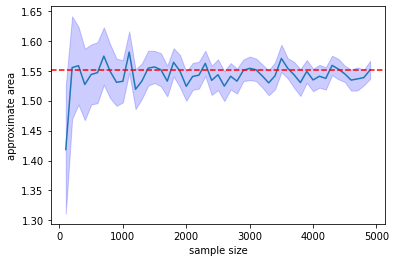

In [14]:
runs = 50
s = np.arange(100, 5000, 100)
i = 100
areas = np.empty((len(s), runs))

for idx in range(0, len(s)):
    for run in range(0, runs):
        areas[idx][run] = 2 * monte_carlo_mandelbrot_set(i, s[idx], re_min= -2, re_max = 2, im_min = 0, im_max = 1.5)
        
mean_areas = np.mean(areas, axis=1)
std = np.std(areas, axis=1)

#95% confidence interval
cis = [st.t.interval(alpha=0.95, df=len(run)-1, loc=np.mean(run), scale=st.sem(run)) for run in areas]
cis_lower = [i[0] for i in cis]
cis_higher = [i[1] for i in cis] 

plt.plot(s, mean_areas)
plt.fill_between(s, cis_lower, cis_higher, color='blue', alpha=0.2)
plt.xlabel("sample size")
plt.ylabel("approximate area")
plt.axhline(y = mean_areas[-1], color = 'r', linestyle = 'dashed')  

In [15]:
runs = 50
i = 100
s = 5000
A_i_s = np.empty(runs)
for run in range(0, runs):
    A_i_s[run] = 2 * monte_carlo_mandelbrot_set(i, s, re_min= -2, re_max = 2, im_min = 0, im_max = 1.5)
mean = np.mean(A_i_s)
ci = st.t.interval(alpha=0.95, df=len(A_i_s)-1, loc=mean, scale=st.sem(A_i_s)) 

print("The mean is:", mean)
print("The 95% confidence interval is", ci)

The mean is: 1.5458399999999997
The 95% confidence interval is (1.5295625955346124, 1.562117404465387)


# Exercise 4: Improving Monte Carlo Integration using recursive boundary zoom

In [34]:
# Boundary Zoom recursively divides the mandelbrotset into 4 subsquares
# In each subsquare, if all numbers are in the set, return square area, if all are out, return 0
# else: split and do it again.

# Returns True if all samples are in the Mandelbrot Set
def sample_in(samples, MaxIter):
    return all([x==MaxIter for x in samples])

# Returns True if none of the samples are in the Mandelbrot Set
def sample_out(samples, MaxIter):
    return all([x<MaxIter for x in samples])

# ON 2x2 area!
# Returns a triple
# [0]: ratio of root samples in mandelbrot set
# [1]: number of root samples taken
# [2]: number of total samples taken
def BoundaryZoom(MaxIterMndlbrt=100, 
                 no_samples=100, 
                 CurrentIter=0,
                 MaxIterZoom=5,
                 re_min=-2, re_max=2, 
                 im_min=-2, im_max=2,):
    
    sample_list = []
    re_dist = re_max - re_min
    im_dist = im_max - im_min
    
    for sample in range(no_samples):
        real_sample = random.uniform(re_min, re_max)
        imag_sample = random.uniform(im_min, im_max)
        c = complex(real_sample, imag_sample)
        sample_list.append(mandelbrot(c, 0, 0, MaxIterMndlbrt))
    
    # If all samples are in the Mandelbrot set, return the area of the square
    if sample_in(sample_list, MaxIterMndlbrt):
        return 1 / 4**CurrentIter, no_samples, no_samples
    
    # IF all samples are not in the Mandelbrot set, return 0
    elif sample_out(sample_list, MaxIterMndlbrt):
        return 0, no_samples, no_samples
    
    elif CurrentIter == MaxIterZoom:
        ratio = sample_list.count(MaxIterMndlbrt) / no_samples
        return ratio / 4**CurrentIter, no_samples, no_samples
    
    else:
        CurrentIter += 1
        
        # split reals and imags
        re_mid = re_min + (re_max - re_min)/2
        im_mid = im_min + (im_max - im_min)/2
        
        # topleft
        TL = BoundaryZoom(MaxIterMndlbrt=MaxIterMndlbrt,
                                    no_samples=no_samples,
                                    CurrentIter=CurrentIter, 
                                    MaxIterZoom=MaxIterZoom,
                                    re_min=re_min, re_max=re_mid, 
                                    im_min=im_mid, im_max=im_max)

        # topright
        TR = BoundaryZoom(MaxIterMndlbrt=MaxIterMndlbrt,
                                    no_samples=no_samples,
                                    CurrentIter=CurrentIter, 
                                    MaxIterZoom=MaxIterZoom,
                                    re_min=re_mid, re_max=re_max, 
                                    im_min=im_mid, im_max=im_max)
    
        # bottomleft
        BL = BoundaryZoom(MaxIterMndlbrt=MaxIterMndlbrt,
                                    no_samples=no_samples,
                                    CurrentIter=CurrentIter, 
                                    MaxIterZoom=MaxIterZoom,
                                    re_min=re_min, re_max=re_mid, 
                                    im_min=im_min, im_max=im_mid)
    
        # bottomright
        BR = BoundaryZoom(MaxIterMndlbrt=MaxIterMndlbrt,
                                    no_samples=no_samples,
                                    CurrentIter=CurrentIter, 
                                    MaxIterZoom=MaxIterZoom,
                                    re_min=re_mid, re_max=re_max, 
                                    im_min=im_min, im_max=im_mid)

        return TL[0]+TR[0]+BL[0]+BR[0], TL[1]+TR[1]+BL[1]+BR[1], (TL[2]+TR[2]+BL[2]+BR[2]+no_samples)

for i in range(7):
    joe = BoundaryZoom(MaxIterZoom=i)
    print(i, joe, joe[0]*16)
    print("ratio of samples used for surface area:{}".format(joe[1]/joe[2]) )



0 (0.09, 100, 100) 1.44
ratio of samples used for surface area:1.0
1 (0.0925, 400, 500) 1.48
ratio of samples used for surface area:0.8
2 (0.11437499999999999, 1600, 2100) 1.8299999999999998
ratio of samples used for surface area:0.7619047619047619
3 (0.09828125, 3400, 4500) 1.5725
ratio of samples used for surface area:0.7555555555555555
4 (0.09609375, 7000, 9300) 1.5375
ratio of samples used for surface area:0.7526881720430108
5 (0.096044921875, 14800, 19700) 1.53671875
ratio of samples used for surface area:0.751269035532995
6 (0.09608886718750001, 36100, 48100) 1.5374218750000002
ratio of samples used for surface area:0.7505197505197505


TODO: Bierviltberekening voor complexiteit van boundaryzoom